<a href="https://colab.research.google.com/github/izzalia89/DomainFrekuensi/blob/main/DomainSpecial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

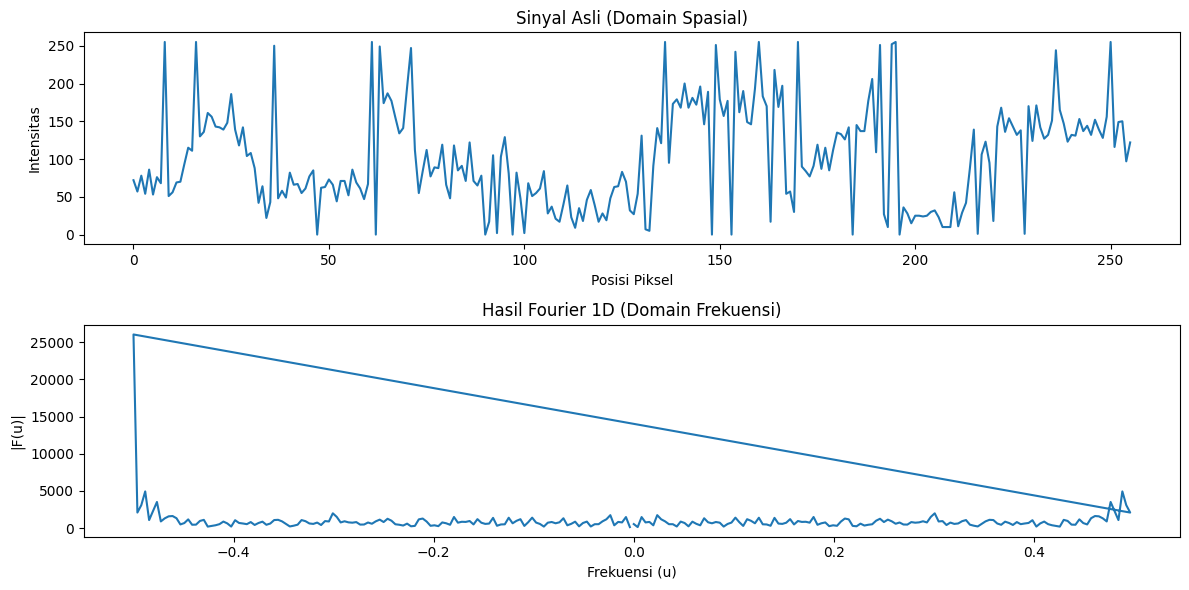

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca gambar grayscale
img = cv2.imread('tomat.jpg', 0)

# 2. Ambil satu baris (misal baris ke-100) sebagai sinyal 1D
row = img[100, :]   # sinyal spasial 1D

# 3. Lakukan Fourier Transform 1D
F = np.fft.fft(row)
Fshift = np.fft.fftshift(F)

# 4. Hitung magnitude spectrum
magnitude = np.abs(Fshift)
freq = np.fft.fftfreq(len(row))

# 5. Tampilkan hasil
plt.figure(figsize=(12,6))


plt.subplot(2,1,1)
plt.plot(row)
plt.title('Sinyal Asli (Domain Spasial)')
plt.xlabel('Posisi Piksel')
plt.ylabel('Intensitas')

plt.subplot(2,1,2)
plt.plot(freq, magnitude)
plt.title('Hasil Fourier 1D (Domain Frekuensi)')
plt.xlabel('Frekuensi (u)')
plt.ylabel('|F(u)|')
plt.tight_layout()
plt.show()


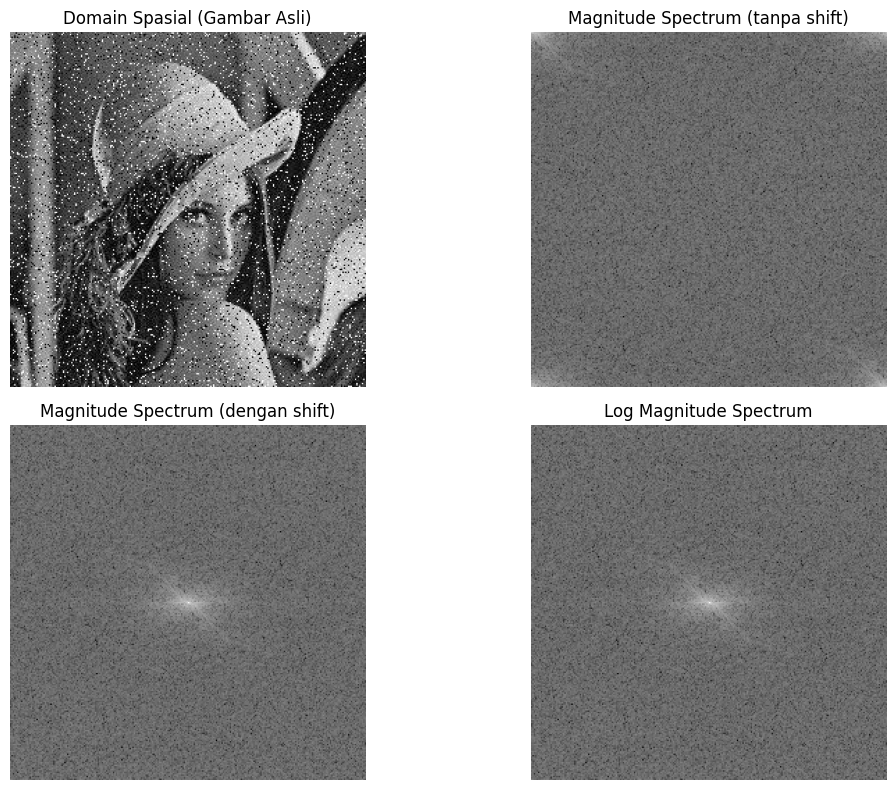

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca gambar dalam grayscale
img = cv2.imread('tomat.jpg', 0)  # ganti nama file sesuai gambar kamu

# 2. Tampilkan gambar asli (domain spasial)
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Domain Spasial (Gambar Asli)')
plt.axis('off')

# 3. Lakukan Transformasi Fourier 2D
f = np.fft.fft2(img)  # Fourier transform 2D
fshift = np.fft.fftshift(f)  # Geser komponen nol ke tengah

# 4. Hitung magnitude spectrum
magnitude_spectrum = np.abs(f)
magnitude_spectrum_shifted = np.abs(fshift)

# 5. Tampilkan hasil transformasi
plt.subplot(2, 2, 2)
plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
plt.title('Magnitude Spectrum (tanpa shift)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(np.log(1 + magnitude_spectrum_shifted), cmap='gray')
plt.title('Magnitude Spectrum (dengan shift)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(20 * np.log(1 + magnitude_spectrum_shifted), cmap='gray')
plt.title('Log Magnitude Spectrum')
plt.axis('off')

plt.tight_layout()
plt.show()


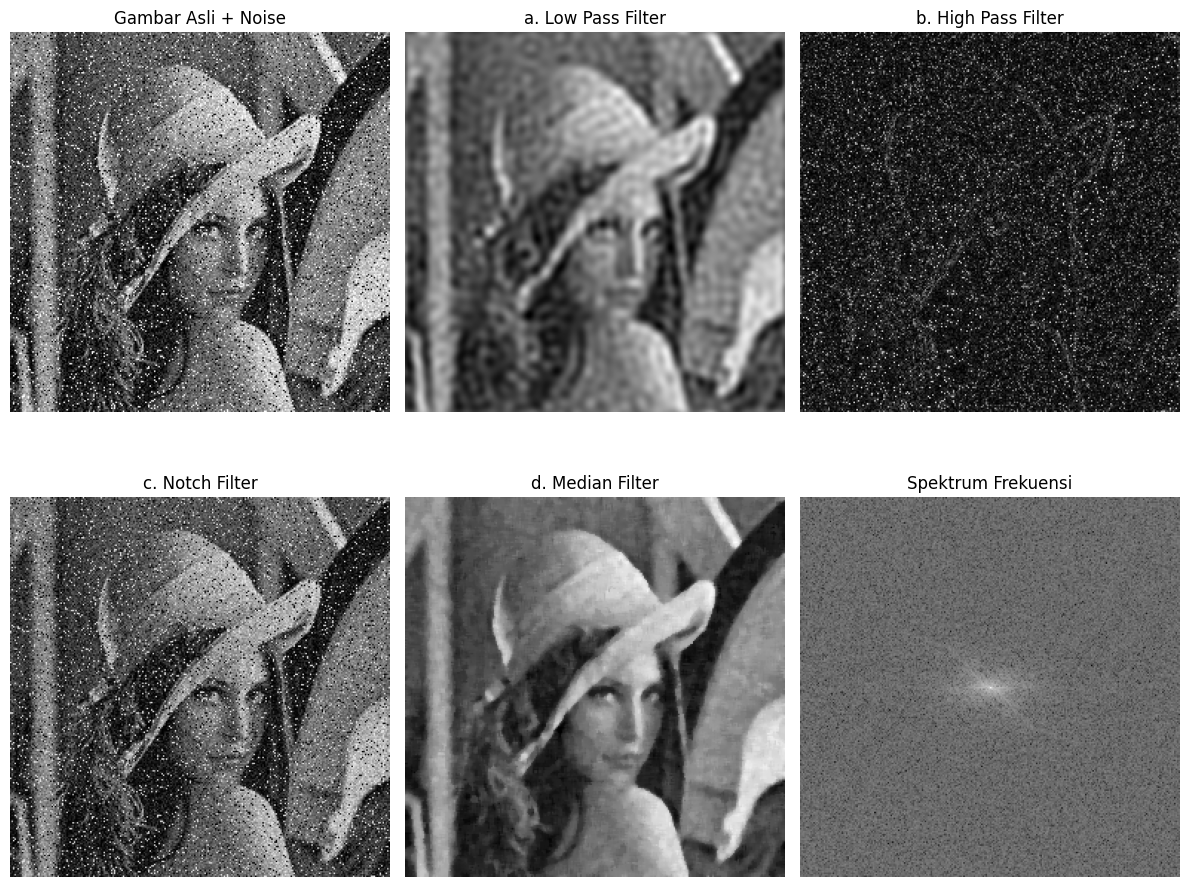

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca gambar grayscale
img = cv2.imread('tomat.jpg', 0)

# Tambahkan sedikit noise untuk simulasi
noise = np.random.normal(0, 20, img.shape)
noisy_img = np.clip(img + noise, 0, 255).astype(np.uint8)

# -------------------------------
# 2. Transformasi Fourier 2D
# -------------------------------
f = np.fft.fft2(noisy_img)
fshift = np.fft.fftshift(f)
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2  # titik tengah

# -------------------------------
# a. LOW PASS FILTER (LPF)
# -------------------------------
mask_lpf = np.zeros((rows, cols), np.uint8)
r = 30  # radius
cv2.circle(mask_lpf, (ccol, crow), r, 1, thickness=-1)

# Terapkan mask ke domain frekuensi
fshift_lpf = fshift * mask_lpf
img_lpf = np.fft.ifft2(np.fft.ifftshift(fshift_lpf))
img_lpf = np.abs(img_lpf)

# -------------------------------
# b. HIGH PASS FILTER (HPF)
# -------------------------------
mask_hpf = np.ones((rows, cols), np.uint8)
cv2.circle(mask_hpf, (ccol, crow), r, 0, thickness=-1)

fshift_hpf = fshift * mask_hpf
img_hpf = np.fft.ifft2(np.fft.ifftshift(fshift_hpf))
img_hpf = np.abs(img_hpf)

# -------------------------------
# c. NOTCH FILTER
# -------------------------------
mask_notch = np.ones((rows, cols), np.uint8)
# Contoh dua notch di sekitar pusat
cv2.circle(mask_notch, (ccol + 40, crow), 10, 0, -1)
cv2.circle(mask_notch, (ccol - 40, crow), 10, 0, -1)

fshift_notch = fshift * mask_notch
img_notch = np.fft.ifft2(np.fft.ifftshift(fshift_notch))
img_notch = np.abs(img_notch)

# -------------------------------
# d. MEDIAN FILTER (spasial)
# -------------------------------
img_median = cv2.medianBlur(noisy_img, 5)

# -------------------------------
# 3. Tampilkan hasil
# -------------------------------
plt.figure(figsize=(12, 10))

plt.subplot(2, 3, 1)
plt.imshow(noisy_img, cmap='gray')
plt.title('Gambar Asli + Noise')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(img_lpf, cmap='gray')
plt.title('a. Low Pass Filter')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(img_hpf, cmap='gray')
plt.title('b. High Pass Filter')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(img_notch, cmap='gray')
plt.title('c. Notch Filter')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(img_median, cmap='gray')
plt.title('d. Median Filter')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(np.log(1 + np.abs(fshift)), cmap='gray')
plt.title('Spektrum Frekuensi')
plt.axis('off')

plt.tight_layout()
plt.show()
